# PART 1 - MACHINE LEARNING

In [136]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Task 1.1 - Data preparation

In [137]:
data = pandas.read_csv("glass_dataset.csv")

targets = data["Type"]
inputs = data.drop("Type", axis=1)

In [138]:
print(data.head())
print(data.columns)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [139]:
print("targets", targets)
print("inputs", inputs)

targets 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64
inputs           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]


In [140]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)

# Task 1.2 - Classification

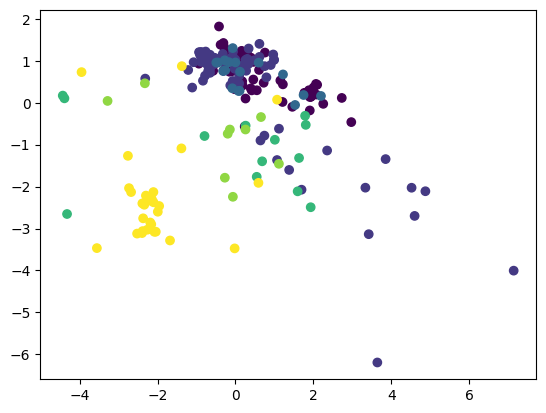

In [141]:
# project into 2d
pca = PCA(n_components=2)
compressed = pca.fit_transform(scaled_inputs)

# train the classifier
classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs, targets)
classifiedData = classifier.predict(scaled_inputs)

# plot the data
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=classifiedData)
plt.show()

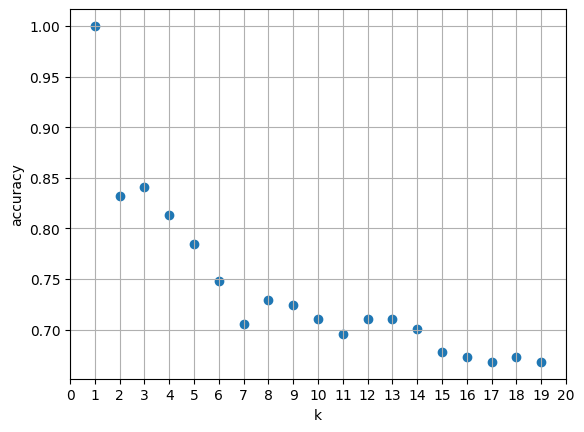

In [142]:
k_range = range(1, 20)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_inputs, targets)
    k_scores.append(knn.score(scaled_inputs, targets))

plt.figure()
plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, k_scores)
plt.xticks ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
plt.show()

In [143]:
xtrain, xtest, ttrain, ttest = train_test_split(compressed, targets, random_state=42)

kernels = ['linear', 'poly', 'rbf']
training_data = []
testing_data = []

for kernel in kernels:
    classifier = SVC(kernel=kernel, gamma='auto')
    classifier.fit(xtrain, ttrain)
    ytrain = classifier.predict(xtrain)
    ytest = classifier.predict(xtest)
    trainAccuracy = accuracy_score(ttrain, ytrain)
    testAccuracy = accuracy_score(ttest, ytest)
    training_data.append(trainAccuracy)
    testing_data.append(testAccuracy)
    print(f"{kernel = }, {trainAccuracy = :.2f} train accuracy {testAccuracy = :.2f} test accuracy")

# the following accuracy results were obtained with gamma = 'auto':
# linear kernel: 0.55 train accuracy 0.61 test accuracy
# poly kernel, degree 2: 0.61 train accuracy 0.67 test accuracy
# poly kernel, degree 3: 0.54 train accuracy 0.46 test accuracy
# rbf kernel: 0.67 train accuracy 0.65 test accuracy

kernel = 'linear', trainAccuracy = 0.55 train accuracy testAccuracy = 0.61 test accuracy
kernel = 'poly', trainAccuracy = 0.54 train accuracy testAccuracy = 0.46 test accuracy
kernel = 'rbf', trainAccuracy = 0.67 train accuracy testAccuracy = 0.65 test accuracy


# Task 1.3 - Assessment of classification

In [144]:
highest_training_values = []
highest_test_values = []
highest_value_names = []

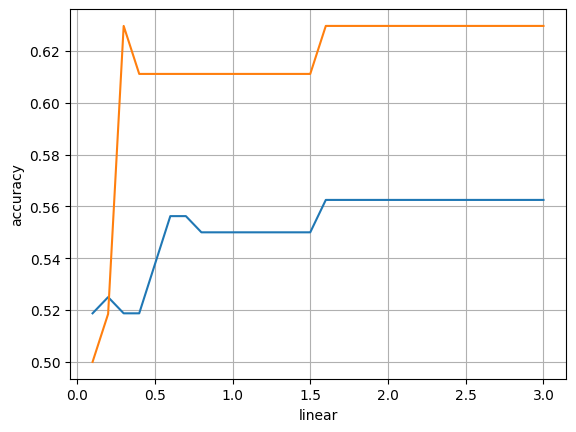

In [145]:
l_range = np.arange(0.1, 3.1, 0.1)
l_scores = []
l_testscores = []
for l in l_range:
    classifier = SVC(kernel='linear', C=l)
    classifier.fit(xtrain, ttrain)
    lytrain = classifier.predict(xtrain)
    lytest = classifier.predict(xtest)
    l_scores.append(accuracy_score(ttrain, lytrain))
    l_testscores.append(accuracy_score(ttest, lytest))

highest_training_values.append(max(l_scores))
highest_test_values.append(max(l_testscores))
highest_value_names.append('linear')

plt.figure()
plt.grid()
plt.xlabel('linear')
plt.ylabel('accuracy')
plt.plot(l_range, l_scores)
plt.plot(l_range, l_testscores)
plt.xticks ([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
plt.show()

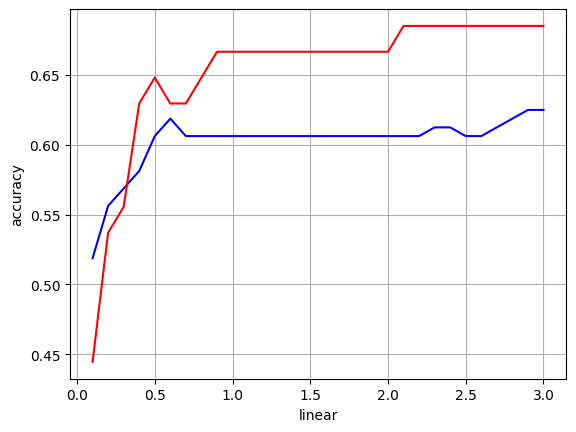

In [146]:
p2_range = np.arange(0.1, 3.1, 0.1)
p2_scores = []
p2_testscores = []
for p2 in p2_range:
    classifier = SVC(kernel='poly', degree=2, C=p2, gamma='auto')
    classifier.fit(xtrain, ttrain)
    p2ytrain = classifier.predict(xtrain)
    p2ytest = classifier.predict(xtest)
    p2_scores.append(accuracy_score(ttrain, p2ytrain))
    p2_testscores.append(accuracy_score(ttest, p2ytest))

highest_training_values.append(max(p2_scores))
highest_test_values.append(max(p2_testscores))
highest_value_names.append('polynomial 2')

plt.figure()
plt.grid()
plt.xlabel('linear')
plt.ylabel('accuracy')
plt.plot(p2_range, p2_scores, label='train', color='blue')
plt.plot(p2_range, p2_testscores, label='test', color='red')
plt.xticks ([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
plt.show()

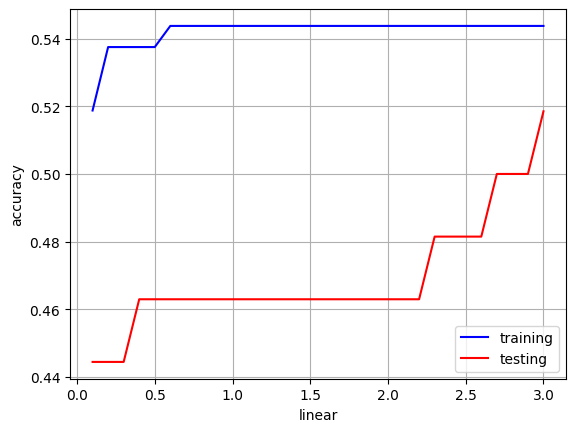

In [147]:
p3_range = np.arange(0.1, 3.1, 0.1)
p3_scores = []
p3_testscores = []
for p3 in p3_range:
    classifier = SVC(kernel='poly', degree=3, C=p3, gamma='auto')
    classifier.fit(xtrain, ttrain)
    p3ytrain = classifier.predict(xtrain)
    p3ytest = classifier.predict(xtest)
    p3_scores.append(accuracy_score(ttrain, p3ytrain))
    p3_testscores.append(accuracy_score(ttest, p3ytest))

highest_training_values.append(max(p3_scores))
highest_test_values.append(max(p3_testscores))
highest_value_names.append('polynomial 3')

plt.figure()
plt.grid()
plt.xlabel('linear')
plt.ylabel('accuracy')
plt.plot(p3_range, p3_scores, label='training', color='blue')
plt.plot(p3_range, p3_testscores, label='testing', color='red')
plt.legend()
plt.xticks ([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
plt.show()

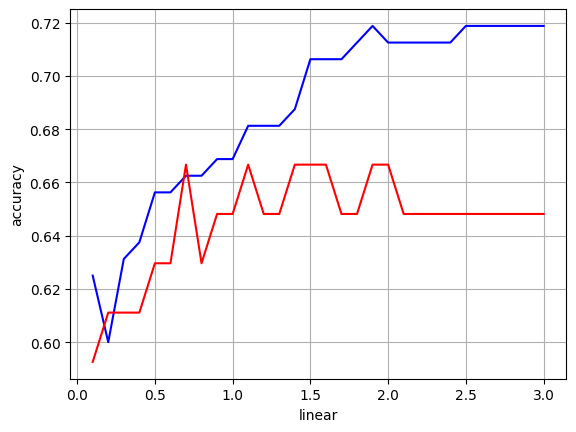

In [148]:
r_range = np.arange(0.1, 3.1, 0.1)
r_scores = []
r_testscores = []
for r in r_range:
    classifier = SVC(kernel='rbf', C=r, gamma='auto')
    classifier.fit(xtrain, ttrain)
    rytrain = classifier.predict(xtrain)
    rytest = classifier.predict(xtest)
    r_scores.append(accuracy_score(ttrain, rytrain))
    r_testscores.append(accuracy_score(ttest, rytest))

highest_training_values.append(max(r_scores))
highest_test_values.append(max(r_testscores))
highest_value_names.append('radial')

plt.figure()
plt.grid()
plt.xlabel('linear')
plt.ylabel('accuracy')
plt.plot(r_range, r_scores, label='training', color='blue')
plt.plot(r_range, r_testscores, label='testing', color='red')
plt.xticks ([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
plt.show()

The radial kernel provides the highest accuracy among SVM models at an accuracy of 0.71875 and the highest accuracy for the kNN model is when each data point has exactly 1 neighbour with an accuracy of 1.
Now, we will cross-validate these two models.

   kNN accuracy  SVC accuracy
0      0.611111      0.611111
1      0.685185      0.629630
2      0.660377      0.641509
3      0.566038      0.698113


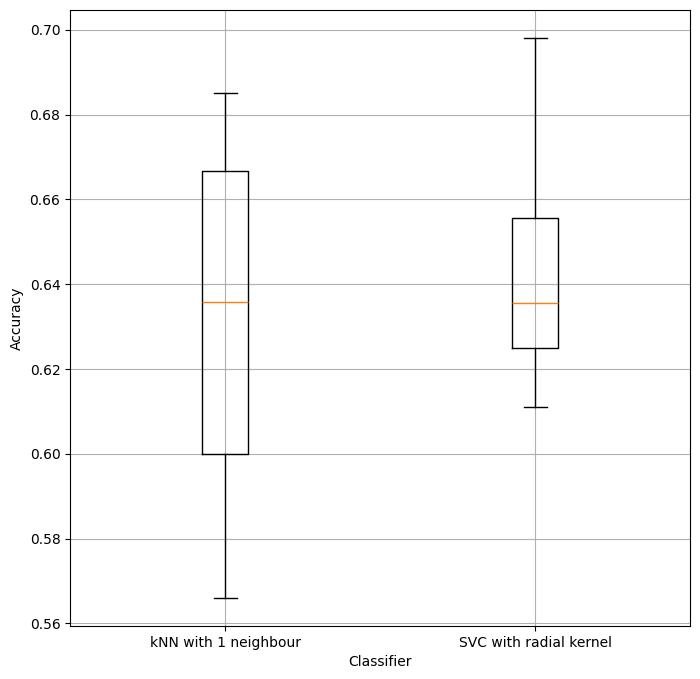

In [149]:
knn_scores = cross_val_score(KNeighborsClassifier(n_neighbors=1), scaled_inputs, targets, cv=4)
svc_scores = cross_val_score(SVC(kernel='rbf', gamma='auto', C=2.5), scaled_inputs, targets, cv=4)

data_frame = pandas.DataFrame({
    'kNN accuracy': knn_scores,
    'SVC accuracy': svc_scores
})
print(data_frame)

plt.figure(figsize=(8, 8))
plt.grid()
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.boxplot(data_frame)
plt.xticks ([1, 2], ['kNN with 1 neighbour', 'SVC with radial kernel'])
plt.show()

While the mean accuracy of both the models are roughly equal, the interquartile range of the nearest neighbour model is significantly wider, which implies more variance with the model's accuracy. With SVC's highest accuracy model, its maximum accuracy is higher than the nearest neighbour's, but not any more likely for it will achieve that higher accuracy.

# Part 2 - Optimisation

# Task 2.1 - Generation of random solutions

In [150]:
def schaffer(x,y):
    return 0.5 + ((np.sin(x**2 - y**2)**2 - 0.5) / (1 + (0.001 * (x**2 + y**2)))**2)

def ackley(x,y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

def easom(x,y):
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

class RandomMutation :
    def mutate ( self , x):
        return np . random . randint (-5 , 5 , x. shape [0])

def evolve (x , y , func , mutation , compare , A):
    xp = mutation.mutate(x)
    yp = mutation.mutate(y)
    yp_value = func(xp, yp)
    if not compare (y, yp_value):
        x=xp
        y=yp_value
    A.append(y)
    return x, y, A

def optimise (D , func , mutation , ngens , compare ):
    x = np.random.randint(-5, 5, D)
    y = np.random.randint(-5, 5, D)
    y = func (x, y)
    archive = []
    for gen in range ( ngens ):
        x, y, archive = evolve (x, y, func, mutation, compare, archive )
    
    return x, y, archive

def greaterThanOrEqual (u, v):
    return np.all(u >= v)


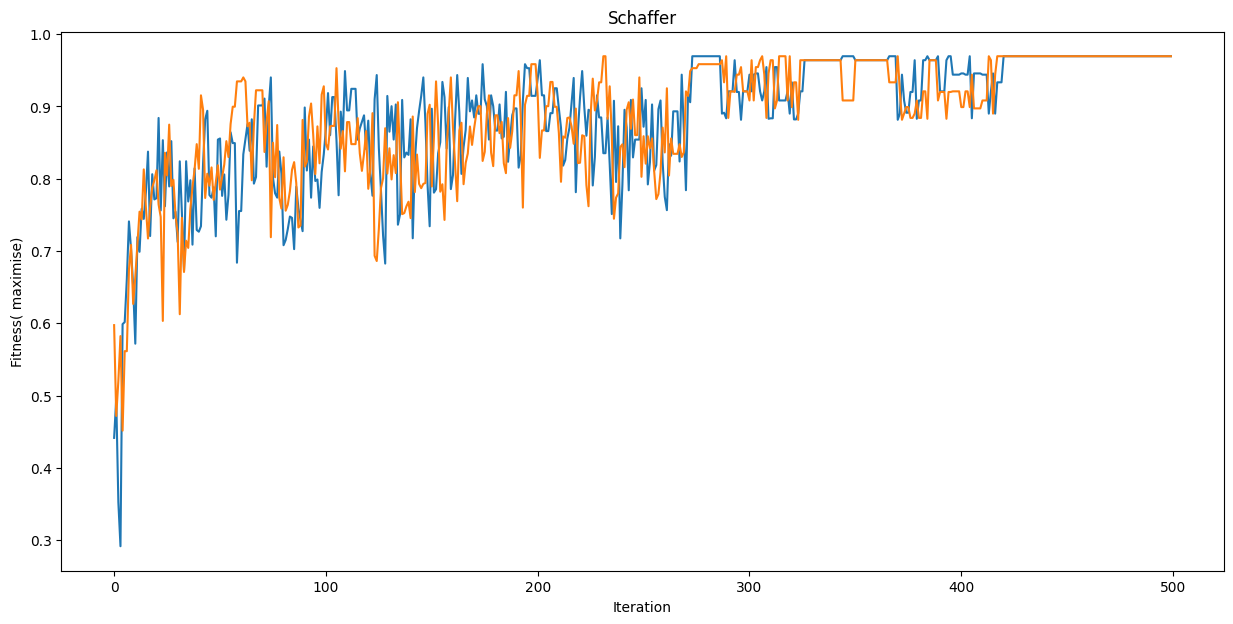

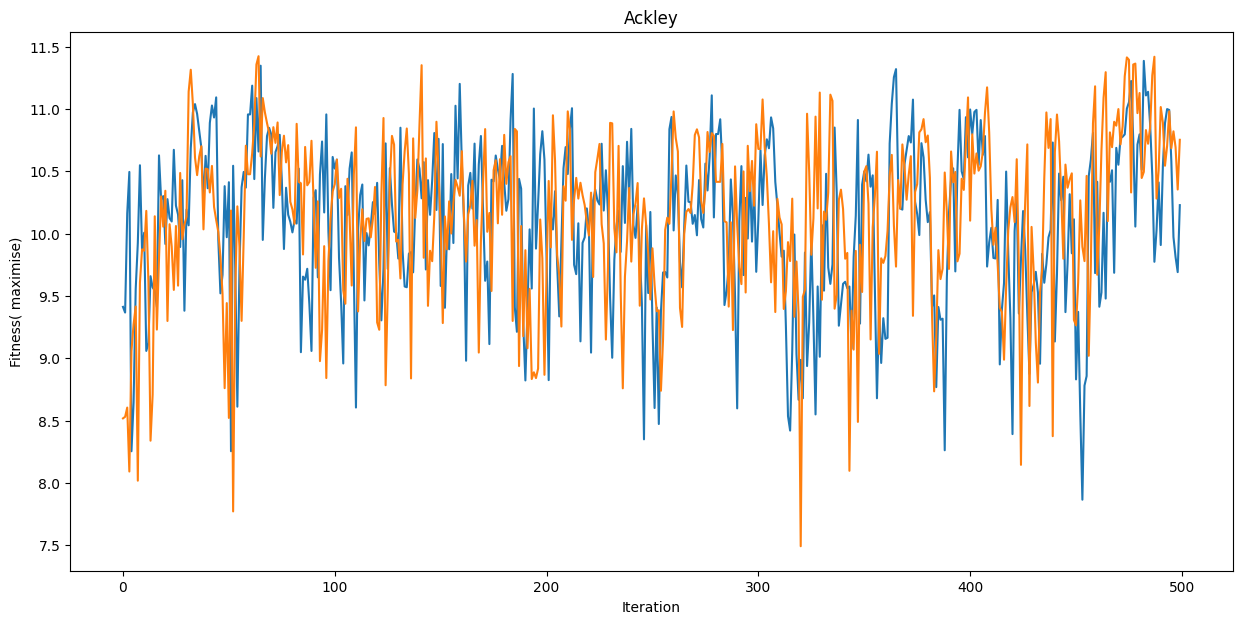

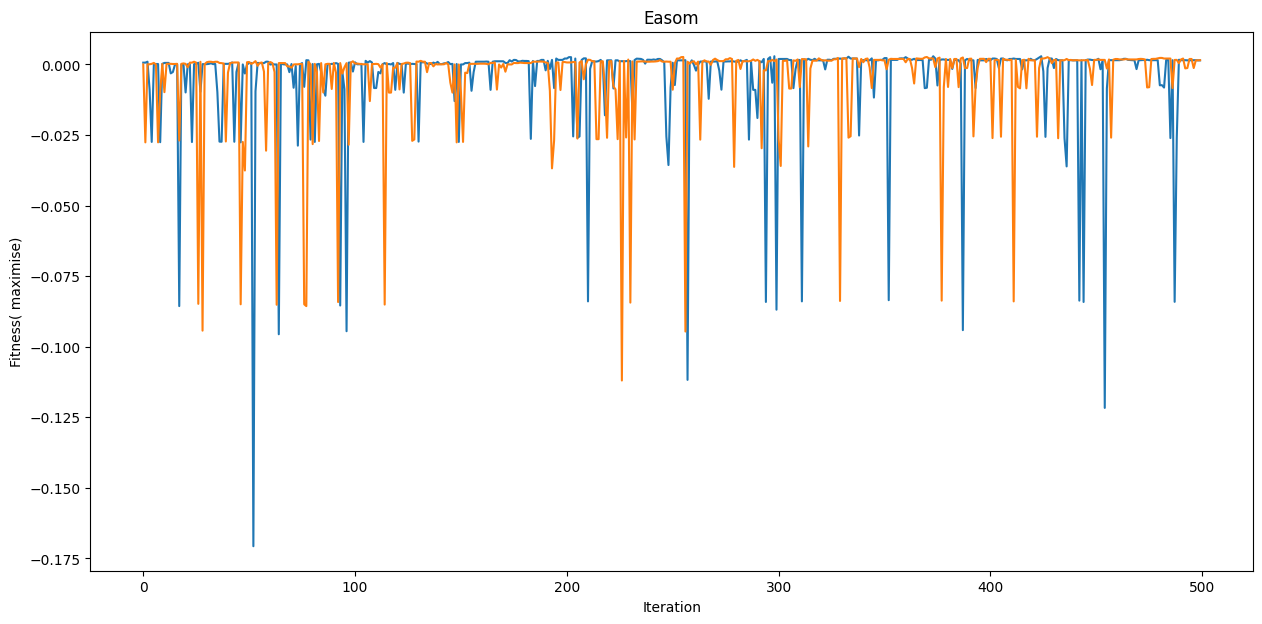

In [151]:
def experiment (func, title):
    mutstrs = ["Random"]
    muts = [RandomMutation()]

    plt.figure(figsize=(15, 7))
    
    for mut, mutstr in zip(muts, mutstrs):
        Ys = []
        for repeat in range(11):
            x, y, ylist = optimise(2, func , mut , 500 , greaterThanOrEqual)
            Ys.append(ylist)
        Ys = np.array(Ys)

        plt.plot(Ys.mean(axis=0), label = mutstr)

    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness( maximise)")

problems = [schaffer, ackley, easom]
titles = ["Schaffer", "Ackley", "Easom"]
for problem, title in zip(problems, titles):
    experiment(problem, title)

## Task 2.2 - Algorithm implementation

In [152]:
class UniformCrossOver:
    def cross(self, x, y):
        return np.random.uniform(x, y)

class GaussianMutation:
    def __init__(self, standard_deviation):
        self.standard_deviation = standard_deviation
    def mutate(self, x):
        return x + np.random.normal(0, self.standard_deviation, x.shape[0])
    
class Elitist:
    def __init__(self, size):
        self.size = size
    def select(self, values, population):
        sorter = np.argsort(values)[::-1]
        elitist_selector = sorter[:self.size]
        return population[elitist_selector]

In [153]:
POPULATION_SIZE = 100
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.1
MAX_GENERATIONS = 100
current_generation = 1
population = []
best_fitness = []

In [154]:
class Person:
    def __init__(self, x, y, func):
        self.x = x
        self.y = y
        self.func = func
        self.fitness = func(x, y)
    
    def mutate(self):
        if np.random.random(1) < MUTATION_PROBABILITY:
            self.x += np.random.normal(0, 1)
            self.y += np.random.normal(0, 1)
    
    def uniform_crossover(self, parent, func):
        if np.random.normal(0, 1) < CROSSOVER_PROBABILITY:
            child_x = self.x
            child_y = self.y
        else:
            child_x = parent.x
            child_y = parent.y
        return Person(child_x, child_y, func)
    
    def get_x (self):
        return self.x
    def get_y (self):
        return self.y
    def get_fitness (self):
        return self.fitness

In [155]:
def create_population(func):
    for i in range(POPULATION_SIZE):
        person = Person(np.random.uniform(-5, 5, 2), np.random.uniform(-5, 5, 2), func)
        population.append(person)

def elitism_selection(population, current_generation, func):
    population.sort(key=lambda x: np.all(x.fitness), reverse=True)
    new_population = []
    for i in range(POPULATION_SIZE):
        parent1 = population[np.random.randint(0, POPULATION_SIZE)]
        parent2 = population[np.random.randint(0, POPULATION_SIZE)]
        child = parent1.uniform_crossover(parent2, func)
        child.mutate()
        new_population.append(child)
    population[:] = new_population
    current_generation += 1
        

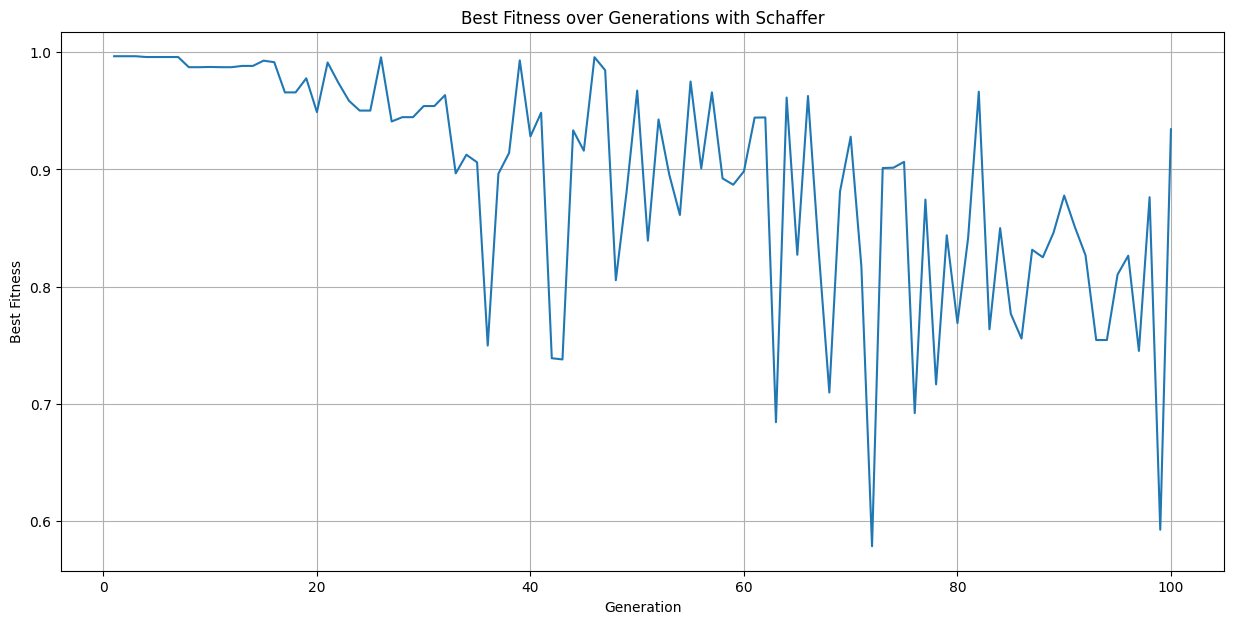

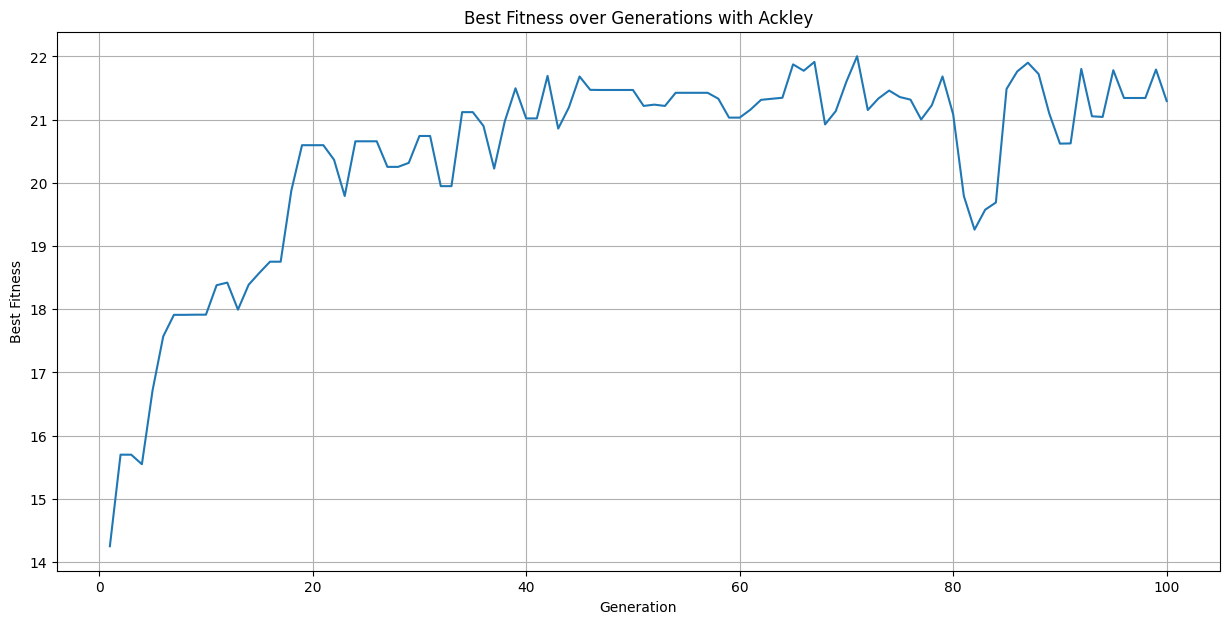

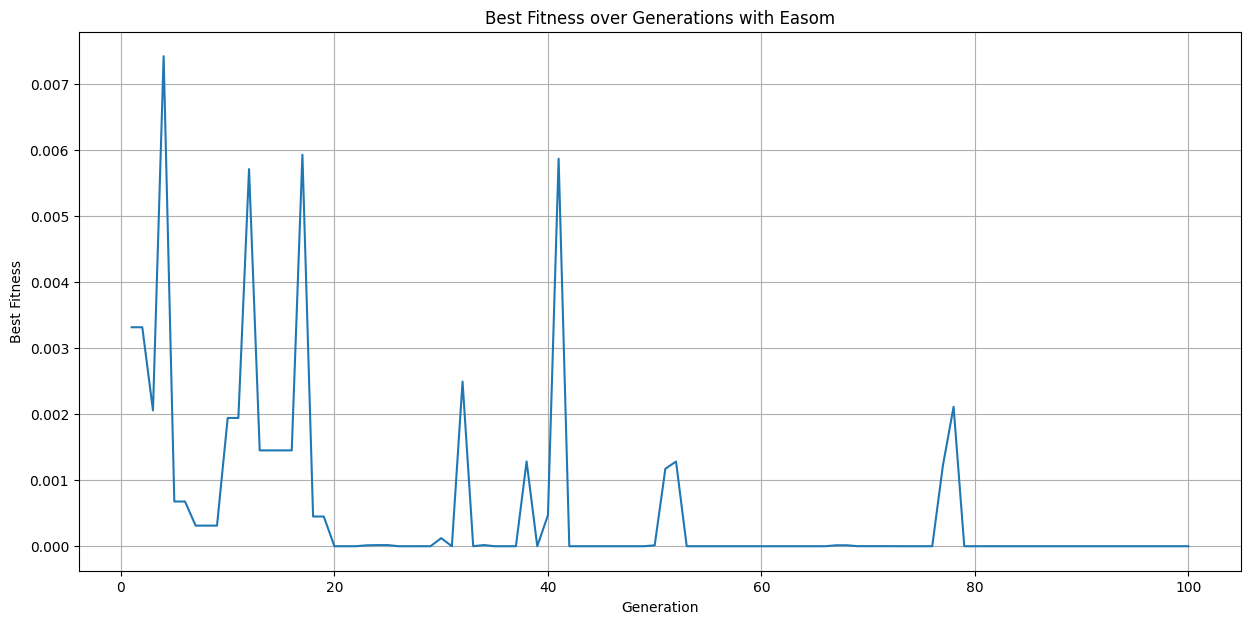

In [162]:
problems = [schaffer, ackley, easom]
titles = ["Schaffer", "Ackley", "Easom"]

for problem, title in zip(problems, titles):
    population.clear()
    best_fitness.clear()
    create_population(problem)

    for generation in range(1, MAX_GENERATIONS + 1):
        elitism_selection(population, current_generation, problem)
        for individual in population:
            individual.fitness = problem(individual.get_x(), individual.get_y())
        best_person = max(population, key=lambda x: np.max(x.fitness))
        best_fitness.append(np.max(best_person.fitness))

    plt.figure(figsize=(15, 7))
    plt.plot(range(1, len(best_fitness) + 1), best_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness over Generations with ' + title)
    plt.grid()
    plt.show()